Add you import statements in the below code block. Please make sure to import Precode.

In [1]:
# import code here
from precode import *
import numpy
import pandas as pd

data = np.load('AllSamples.npy')

Below cell contains starter code to generate the initial centers. 

* Please do not change anything apart from the student ID.

* The initial centers will be in a dictionary with keys being 'k' and value being the centers.


In [2]:
initial_centers = {}
for k in range(2, 11):
    centers = initial_S1("0406", k)  # please replace 0111 with your last four digit of your ID
    initial_centers[k] = centers

Print the last 4 digits of your student id as string in the cell below. Please make sure to only have one print statement in the cell below.

In [3]:
### TEST FUNCTION: test_student_id
# DO NOT REMOVE THE ABOVE LINE

print("0406")

0406


Add your code for computing the kMeans final centroids and loss functions in the code block below.

In [4]:
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

def assign_points_to_centroids(data, centroids):
    clusters = {}
    for i in range(len(centroids)):
        clusters[i] = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        min_distance_index = distances.index(min(distances))
        clusters[min_distance_index].append(point)
    return clusters

def update_centroids(clusters):
    centroids = []
    for i in sorted(clusters.keys()):
        centroids.append(np.mean(clusters[i], axis=0))
    return centroids

def k_means(data, initial_centroids, num_iterations):
    centroids = initial_centroids
    for _ in range(num_iterations):
        clusters = assign_points_to_centroids(data, centroids)
        new_centroids = update_centroids(clusters)
        # Check for convergence (if centroids don't change)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters



Please use the following cell to print all the final centeriods for k in the range of 2 to 10, both inclusive.

**Notes:**
* The centeriods should have the following format: `[[x1,y1],[x2,y2],[x3,y3]][[x1,y1],[x2,y2],[x3,y3]]`
* The order of the centeriod does not matter but do NOT change the order for `x` and `y` coordinate.
* Please print the centroids from k=2 to k=10 in order and each on a new line.
* Do not print anything else in the code cell below.

**Output format:**

[[x1, y1], [x2, y2]]

[[x1, y1], [x2, y2], [x3, y3]]

.

.

.

[[x1,y1], [x2,y2].....[x9,y9]]

In [5]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE THE ABOVE LINE

loss_values = {}

for k in range(2, 11):
    initial_centers_for_k = initial_centers[k]
    
    final_centers, clusters = k_means(data, initial_centers_for_k, num_iterations=100)
    
    formatted_centers = [[float(x), float(y)] for x, y in final_centers]
    
    print(formatted_centers)
    
    loss = 0
    for cluster_index, cluster_points in clusters.items():
        centroid = final_centers[cluster_index]
        
        for point in cluster_points:
            loss += np.sum((point - centroid) ** 2)  
    
    loss_values[k] = loss

[[4.852611930287174, 7.271641711202775], [5.000562341588762, 2.4854274751531933]]
[[5.555241823602507, 2.1898095818920966], [2.6194686848974693, 5.965194768533931], [6.497249620849709, 7.522972929895171]]
[[5.688088455616345, 2.1926724226485956], [7.811623277495601, 8.543243038346525], [5.319949249411706, 6.998343830758151], [2.535096922613029, 5.667654121086652]]
[[2.846036655338656, 6.9599661539304085], [7.56215485277933, 2.9674338047811917], [6.395281197605469, 0.7371712605152874], [6.597851586939889, 7.632089958919006], [3.3387129878564745, 2.761104254450238]]
[[7.756483249146484, 8.556689279063415], [7.414192434680615, 2.3216911383868664], [3.5024550031763066, 3.6287047567208766], [2.523828850389605, 7.028974690748701], [3.145061482959145, 0.9077065486588153], [5.464277356727894, 6.837713536435891]]
[[5.021776597933489, 7.8240125818092165], [7.914309977818314, 8.519909807700076], [2.681986334188929, 2.094615867800809], [6.15468228405522, 5.701407205679413], [2.5633381461259046, 6.

Please use the following cell to print all the final loss functions for k in the range of 2 to 10, both inclusive.

**Notes:**

* Print the loss functions for every value of k on a new line and in order.
* Do not print anything else in the code cell below.

**Output format:**

L1

L2

.

.

.

L9


In [6]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE THE ABOVE LINE

for k in range(2, 11):
    print(loss_values[k])

1921.0334858562057
1294.2984174853175
1116.3315012668609
735.6040456800639
476.2965705269664
390.91757625422497
290.85730924383114
240.38031402770528
264.59279904978484


**This part of the project is manually graded.**

Use the cells below to write the code for generating the loss function plot.

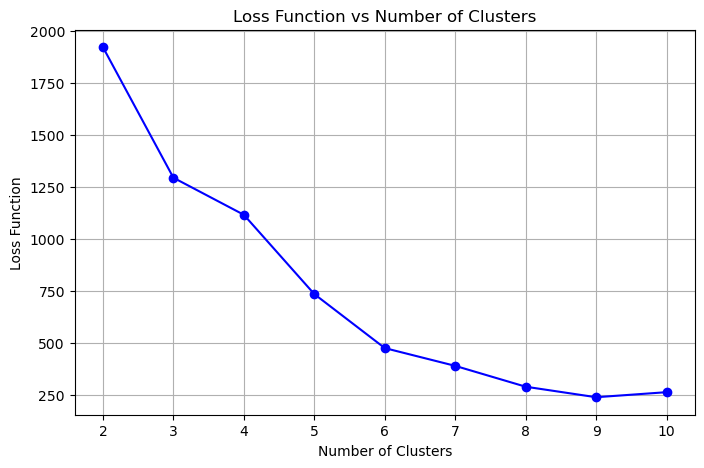

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(list(loss_values.keys()), list(loss_values.values()), marker='o', color='b')
plt.title("Loss Function vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Loss Function")
plt.grid(True)
plt.show()

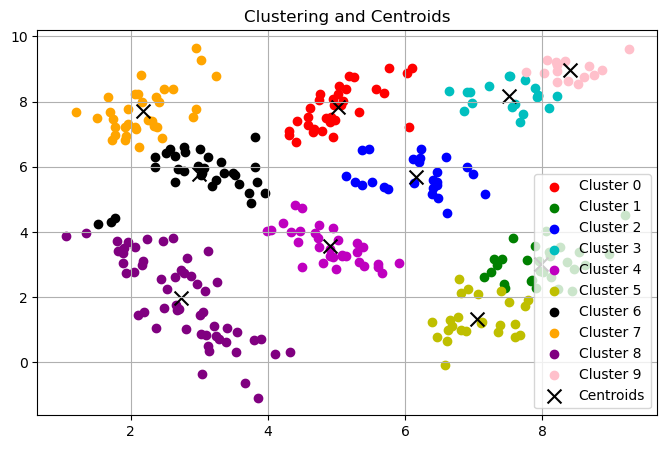

In [8]:
import matplotlib.pyplot as plt

def plot_clusters_and_centroids(k, data, clusters, centroids):
    plt.figure(figsize=(8, 5))
    
    # Plot each cluster with a different color
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # Adjust colors for k > 10
    for cluster_index, cluster_points in clusters.items():
        cluster_points = np.array(cluster_points)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_index], label=f"Cluster {cluster_index}")
    
    # Plot the centroids
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label="Centroids")
    
    plt.title(f"Clustering and Centroids")
   
    plt.legend()
    plt.grid(True)
    plt.show()

# Example for plotting clusters and centroids for a specific k (e.g., k=5)
k_to_plot = 5
plot_clusters_and_centroids(k_to_plot, data, clusters, final_centers)